## Introduction to Scikit Learn (sk-learn)


This notebook demonstrate some of the most useful functions of the beautiful Scikit-learn library.

What we are going to cover:

0. An end-to-end scikit-learn workflow.
1. Getting the data ready.
2. Choose the right algorithm/estimator for our problem.
3. Fit the model/algorithm to make predictions on our data.
4. Evaluate a model.
5. Improve a model.
6. Save and load a trained model.
7. Putting it all together.

## 0. An end to end scikit-learn workflow

In [1]:
# Standrard Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# get the data ready
heart_disease = pd.read_csv("../pandas/heart-disease.csv")
heart_disease[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Create X (feature matrix)
X = heart_disease.drop("target", axis=1)

# Create Y (labels)
y = heart_disease["target"]

In [4]:
# Choose the right modal and hyper parameters

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier();

# we will keep the default hyper parameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# Fit the model to data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
clf.fit(X_train, y_train);

In [7]:
# make a prediction

y_preds = clf.predict(X_test)
y_preds

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [8]:
y_test

284    0
198    0
53     1
139    1
130    1
      ..
144    1
267    0
159    1
260    0
206    0
Name: target, Length: 61, dtype: int64

In [9]:
# Evaluate the model on the training data and the test data

clf.score(X_train, y_train)

1.0

In [10]:
clf.score(X_test, y_test)

0.8852459016393442

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.88      0.91      0.90        33

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [12]:
confusion_matrix(y_test, y_preds)

array([[24,  4],
       [ 3, 30]])

In [13]:
accuracy_score(y_test, y_preds)

0.8852459016393442

In [14]:
import numpy as np

In [15]:
# Improve a model
# try different amount of hyper parameters

np.random.seed(42)
for i in range(10, 100, 5):
    print(f"Try model with {i} estimators.")
    clf = RandomForestClassifier(n_estimators=1).fit(X_train,y_train);
    print(f"Model accuracy on test set, {clf.score(X_test, y_test) * 100:.2f} %")
    

Try model with 10 estimators.
Model accuracy on test set, 81.97 %
Try model with 15 estimators.
Model accuracy on test set, 70.49 %
Try model with 20 estimators.
Model accuracy on test set, 68.85 %
Try model with 25 estimators.
Model accuracy on test set, 63.93 %
Try model with 30 estimators.
Model accuracy on test set, 62.30 %
Try model with 35 estimators.
Model accuracy on test set, 70.49 %
Try model with 40 estimators.
Model accuracy on test set, 81.97 %
Try model with 45 estimators.
Model accuracy on test set, 73.77 %
Try model with 50 estimators.
Model accuracy on test set, 70.49 %
Try model with 55 estimators.
Model accuracy on test set, 70.49 %
Try model with 60 estimators.
Model accuracy on test set, 63.93 %
Try model with 65 estimators.
Model accuracy on test set, 67.21 %
Try model with 70 estimators.
Model accuracy on test set, 72.13 %
Try model with 75 estimators.
Model accuracy on test set, 63.93 %
Try model with 80 estimators.
Model accuracy on test set, 65.57 %
Try model 

In [16]:
# Save a model and load it

import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [17]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.7377049180327869

## Getting the data ready to be used with machine learning

Three main things we have to do:

    1. Split data in features and labels (usually `X` and `y`)
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non numerical values to numerical values. (also called feature encoding)

In [18]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
X = heart_disease.drop("target", axis=1);
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [20]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [21]:
# Split the data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## 1.1 Make sure it's all numerical

In [23]:
car_sales = pd.read_csv("data/car-sales-extended.csv");
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [24]:
len(car_sales)

1000

In [25]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [26]:
# Split the data into X and y

X = car_sales.drop("Price", axis = 1);
y = car_sales["Price"];


# Split into training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
# Build machine learning model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train);
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [28]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([
    ("one_hot", one_hot, categorical_features)
], remainder="passthrough")


transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [29]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [30]:
df_X = pd.DataFrame(transformed_X)
df_X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [31]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies.head()

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False


In [32]:
# Let's refit the model

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)

model.fit(X_train, y_train)

RandomForestRegressor()

In [33]:
model.score(X_test, y_test)

0.3235867221569877

## What if there are missing values ?

1. Fill them with some values (also known as imputation)
2. Remove the samples with missing data together.

In [34]:
# import car sales missing data

car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [35]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [36]:
# Create X and y

X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [37]:
# Lets try and convert them to numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4000 stored elements and shape (1000, 16)>

In [38]:
df_missing_X = pd.DataFrame(transformed_X)
df_missing_X.head()

,0
0,<Compressed Sparse Row sparse matrix of dtype ...
1,<Compressed Sparse Row sparse matrix of dtype ...
2,<Compressed Sparse Row sparse matrix of dtype ...
3,<Compressed Sparse Row sparse matrix of dtype ...
4,<Compressed Sparse Row sparse matrix of dtype ...


In [39]:
dummies = pd.get_dummies(car_sales_missing[["Make", "Colour", "Doors"]])
dummies.head()

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4.0,False,True,False,False,False,False,False,False,True
1,5.0,True,False,False,False,False,True,False,False,False
2,4.0,False,True,False,False,False,False,False,False,True
3,4.0,False,False,False,True,False,False,False,False,True
4,3.0,False,False,True,False,False,True,False,False,False


In [40]:
# Missing empty values with Scikit learn

car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [41]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [42]:
# Drop the rows with no labels

car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [43]:
# Split data in X and y

X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [44]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with missing and numerical values with mean

cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(fill_value="mean")

# Define Columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"] 

# Create an imputer that fills missing data
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_features", num_imputer, num_features),
])

#Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [45]:
car_sales_filled = pd.DataFrame(
    filled_X,
    columns=["Make", "Colour", "Doors", "Odometer (KM)"]
)

car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [46]:
car_sales.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([
    ("one_hot", one_hot, categorical_features)
], remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>

In [48]:
# now, we have got data as number and missing values filled

np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    transformed_X, y, test_size=0.2
)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test,  y_test)


0.21990196728583944

# Choosing the right estimators/algorithms for your programs

Some things to note: 
* Sklearn refers to machine learning models, algorithms as **estimators**
* Classification Problem - Predicting a category (heart disease or not)
    * Sometimes you will see `clf` (short for classifier) used as a classification estimators.
* Regression Problem - Predicting a number (selling price of a car)

### 2.1 Picking a machine learning model for a regression problem

Let's use the California Housing Dataset - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [49]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [50]:
housing_df = pd.DataFrame(housing['data'], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [51]:
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [52]:
# Import algorithm 

# setup random seed
np.random.seed(42)

# create data 
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# split into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate and fit the model
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model
model.score(X_test, y_test)


0.5758549611440126

What if `Ridge` didn't work or the score didn't fit our needs ?

Well, we could try a different model

How about we try  an ensemble model. (an ensemble is a combination of smaller models to make better predicitons on useen data)

In [53]:
from sklearn.ensemble import RandomForestRegressor

# setup random seed
np.random.seed(42)

# create data 
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# split into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create the model
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8066196804802649

## 2.2 Choosing an estimator for classification problem

In [54]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Consulting with map and this says to try `LinearSVC`

In [55]:
# Import the Linear SVC estimator class
from sklearn.svm import LinearSVC

# setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8688524590163934

In [56]:
# Import the Random Forest Classifier estimator class
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.875

Tidbit:

    1. If u have structured data, used ensemble method
    2. If u have unstructured data, use deep learning or transfer learning

# 3. Fit the model/algorithm on our data and use to make predicitons

## 3.1 Fitting the model to the data

Different names for: 
* X = features, feature variables, data
* y = target, target variables, labels

In [57]:
# Import the Random Forest Classifier estimator class
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier()

# Fit the model to the data
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier
clf.score(X_test, y_test)

0.875

## 3.2 Make predictions using machine learning model

There are 2 ways to make predictions:

1. `predict()` Predict function
2. `predict_proba()`

In [58]:
# use a trained model to make predications

clf.predict(np.array([1, 7, 8, 4, 3])) # this does not work ........

/opt/conda/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 4. 3.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [59]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [60]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [61]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
193    0
184    0
132    1
202    0
196    0
Name: target, Length: 64, dtype: int64

In [62]:
# Compare predictions to truth lable to compare the model

y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.875

In [63]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_preds)

0.875

Make predictions with `predict_proba()`

In [64]:
# predict_proba() returns probabilities of classifications label

clf.predict_proba(X_test[:5])

array([[0.9 , 0.1 ],
       [0.39, 0.61],
       [0.42, 0.58],
       [0.82, 0.18],
       [0.18, 0.82]])

In [65]:
# Lets predict on same data
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

`predict()` can also be used for regression problems

In [66]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [67]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop("target" , axis=1)
y = housing_df["target"]

# split into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create a model instance
model = RandomForestRegressor()

# Fit the model to data
model.fit(X_train, y_train)

# Make predictions 
y_preds = model.predict(X_test)

In [68]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [69]:
# Compare the preiction to truth

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3265721842781009

# 4.Evaluating machine learning model

Three ways to evaluate scikit-learn model/estimators

1. Estimator's builtin `score()` method
2. The `scoring` parameter
3. Problem specific metric function

You can read more about this at: model_evaluation.html from scikit-learn

## 4.1 Evaluating the model with builtin `score()` method

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.875

Let's use `score` on our Regression Problem

In [71]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8066196804802649

## 4.2 Evaluating a model using `scoring` parameter

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.875

In [74]:
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

## 4.2.1 Classification model evaluation metrices

1. Accuracy
2. Area under ROC code
3. Confusion Metrics
4. Classification Report

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score =  cross_val_score(clf, X, y)

In [76]:
print(f"Heart Disease Classifier Cross-validated Accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross-validated Accuracy: 82.48%


**Area under the receiver operating characterestics curve (AUC/ROC)**

* Area under Curve (AUC)
* Receiver Operators Characterestics (ROC) curve

ROC curves are a comparison of model's true postive rate (tpr) versus a models false positive rate (ftr)

* True Positive = model predict 1 when truth is 1
* False Positive = model predict 1 when truth is 0
* True Negative = model predict 0 when truth is 0
* False Negative = model predict 0 when truth is 1

In [77]:
from sklearn.metrics import roc_curve

# Create X_test etc ........
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21)

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.59, 0.41],
       [0.2 , 0.8 ],
       [0.61, 0.39],
       [0.67, 0.33],
       [0.65, 0.35],
       [0.09, 0.91],
       [0.39, 0.61],
       [0.94, 0.06],
       [0.16, 0.84],
       [0.55, 0.45]])

In [78]:
y_probs_positive = y_probs[:, 1]
y_probs_positive

array([0.41, 0.8 , 0.39, 0.33, 0.35, 0.91, 0.61, 0.06, 0.84, 0.45, 0.85,
       0.69, 0.97, 0.42, 0.78, 0.07, 0.71, 0.56, 0.06, 0.05, 0.94, 0.77,
       1.  , 0.76, 0.07, 0.19, 0.81, 0.25, 0.6 , 0.41, 0.22, 0.2 , 0.21,
       0.44, 0.92, 0.98, 0.86, 0.82, 0.2 , 1.  , 0.31, 0.73, 0.84, 0.34,
       0.  , 0.46, 0.05, 0.91, 0.7 , 0.29, 0.48, 0.31, 0.8 , 0.27, 0.49,
       0.98, 0.59, 0.11, 0.95, 0.06, 0.03, 0.62, 0.86, 0.88])

In [79]:
# calculate fpr, tpr and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# check the false positive array
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.06896552, 0.06896552, 0.10344828, 0.10344828,
       0.13793103, 0.13793103, 0.17241379, 0.17241379, 0.31034483,
       0.31034483, 0.34482759, 0.34482759, 0.34482759, 0.37931034,
       0.37931034, 0.44827586, 0.44827586, 0.51724138, 0.51724138,
       0.55172414, 0.62068966, 0.68965517, 0.75862069, 0.86206897,
       0.93103448, 1.        ])

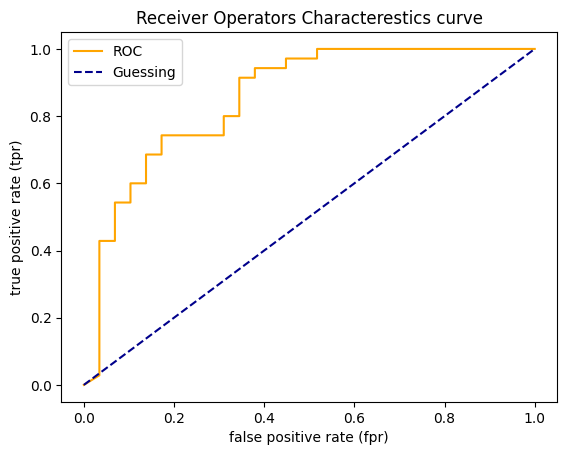

In [80]:
# Create a function for plotting ROC curve
import matplotlib.pyplot as plt
%matplotlib inline

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve fiven the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # plot roc curve
    plt.plot(fpr, tpr,  c="orange", label="ROC")

    # plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", label="Guessing", linestyle="--")

    #customize the plot
    plt.xlabel("false positive rate (fpr)")
    plt.ylabel("true positive rate (tpr)")
    plt.title("Receiver Operators Characterestics curve")

    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [81]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.854679802955665

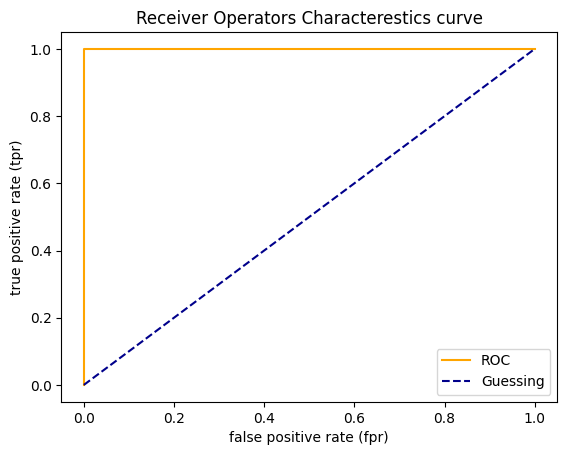

In [82]:
# Plot the perfect ROC curve and AUC score

fpr, tpr, thresholds  = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [83]:
# Perfect AUC score
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_test)

1.0

# Confusion Matrics - *Part One*

Confusion Matrix is a quick way to compare the labels a model predict and the actual labels. It was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [84]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 9, 26]])

In [85]:
# Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test, y_preds, rownames=["Actual Lables"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Lables,,
0,23,6
1,9,26


<Axes: >

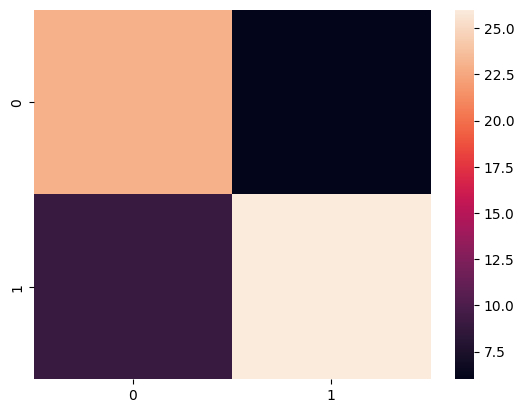

In [86]:
# Make a confusion matrix with more visual with seaborn heatmap

import seaborn as sns

# set the font scale
# sns.set(font_scale=1.5)

# create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# plot it using seaborn
sns.heatmap(conf_mat)

# Confusion Matrics - *Part Two*

Confusion Matrix is a quick way to compare the labels a model predict and the actual labels. It was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [87]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 9, 26]])

In [88]:
pd.crosstab(y_test, y_preds, rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,9,26


### Creating a confusion metrics using Scikit learn

To use the new methods of you will creating a confusion with Sk-learn. you will need sk-learn version 1.0+

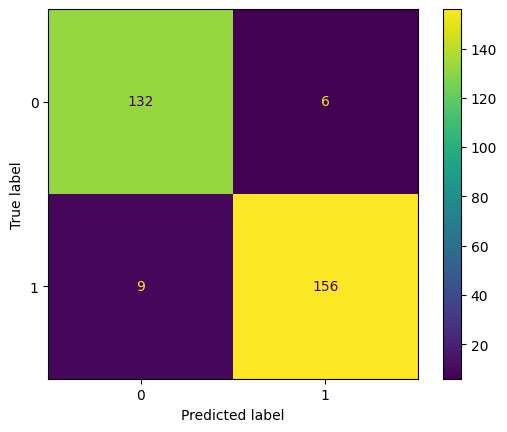

In [89]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    estimator=clf,
    X = X,
    y = y
);

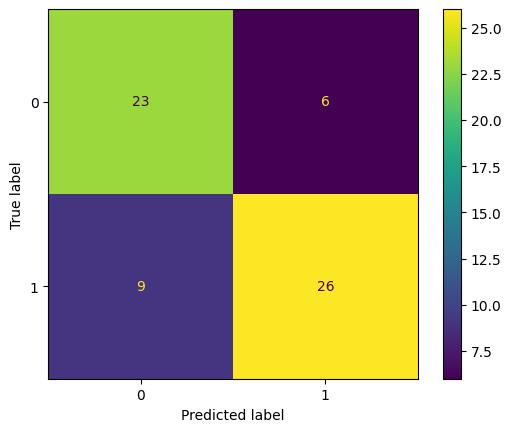

In [90]:
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_preds
);

# Classification Report

In [91]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75        29
           1       0.81      0.74      0.78        35

    accuracy                           0.77        64
   macro avg       0.77      0.77      0.77        64
weighted avg       0.77      0.77      0.77        64



# Where precision and recall become valuable (use case of all metrices)

In [92]:
disease_true = np.zeros(10000);
len(disease_true)

10000

In [93]:
# update one to positive case
disease_true[0] = 1;

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evaluation metrices

What we are going to cover:

* R^2 (pronounced as R-squared) or coefficient of determination
* Mean absolute error (MAE)
* Mean squared error (MSE)

In [94]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)

RandomForestRegressor()

In [95]:
model.score(X_test, y_test)

0.8066196804802649

In [96]:
from sklearn.metrics import r2_score

# fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [97]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [98]:
r2_score(y_test, y_test_mean)

0.0

**Mean Absolute Error (MAE)**

MAE is the average of the absolute differences between predictions and actual values

It gives you an idea of how wrong your model predictions are

In [99]:
#MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae 

0.3265721842781009

In [100]:
df= pd.DataFrame(
    data = {
        "actual values" : y_test,
        "predicted values": y_preds
    }
)
df[:10]

,actual values,predicted values
20046,0.47700,0.493840
3024,0.45800,0.754940
15663,5.00001,4.928596
20484,2.18600,2.540290
9814,2.78000,2.331760
13311,1.58700,1.654970
7113,1.98200,2.343230
7668,1.57500,1.661820
18246,3.40000,2.474890
5723,4.46600,4.834478


In [101]:
df["differences"] = df["predicted values"] - df["actual values"]
df[:10]

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540290,0.354290
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.654970,0.067970
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [102]:
# MAE using formula and differences

np.abs(df["differences"]).mean()

0.3265721842781009

**Mean Squared Error (MSE)**

MSE is the mean of the square of error between actual and predicted values. 

In [103]:
# MSE

from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534073069137548

In [104]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [105]:
# Calculate MSE by hand

squared = np.square(df["differences"])
squared.mean()

0.2534073069137548

In [106]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [107]:
# calculate MSE with large erro


df_large_error["squared_differences"].mean()

0.25728320720794084

## 4.2.3 Finally using the `scoring` parameter

In [108]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [109]:
np.random.seed(42)

# Cross Validation Accuracy
cv_acc = cross_val_score(clf, X, y)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [110]:
# Cross validated accuracy
print(f"The cross validation accuracy is: {np.mean(cv_acc) * 100:.2f}%")

The cross validation accuracy is: 82.48%


In [111]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [112]:
# Cross validated accuracy
print(f"The cross validation accuracy is: {np.mean(cv_acc) * 100:.2f}%")

The cross validation accuracy is: 82.48%


In [113]:
# precision
np.random.seed(42)

cv_precision = cross_val_score(clf, X, y, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [114]:
# Cross validated precision
print(f"The cross validation precision is: {np.mean(cv_precision)}")

The cross validation precision is: 0.8329547346025924


In [115]:
# recall
np.random.seed(42)

cv_recall = cross_val_score(clf, X, y, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [116]:
# Cross validated recall
print(f"The cross validation recall is: {np.mean(cv_recall)}")

The cross validation recall is: 0.8545454545454545



Let's see the `scoring` parameter to use for regression problem.

In [117]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor


np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor()

In [118]:
np.random.seed(42)

cv_r2 = cross_val_score(model, X, y)
cv_r2

array([0.51682354, 0.70280719, 0.74200859, 0.61659773, 0.68247339])

In [119]:
np.mean(cv_r2)

0.6521420895559876

In [120]:
# Mean squared error

np.random.seed(42)

cv_mse = cross_val_score(model, X, y, cv=3, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.4613720134531419

In [121]:
# Mean absolute error

np.random.seed(42)

cv_mae = cross_val_score(model, X, y, cv=3, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.4835493810852714

In [122]:
cv_mse

array([-0.51013593, -0.33368417, -0.54029594])

In [123]:
cv_mae

array([-0.51752855, -0.4267802 , -0.50633939])

## 4.3 Using different evaluation metrics as Scikit-learn functions

The 3rd way to evaluate the scikit-learn machine learning models/estimators is to using the `sklearn.metrics` module

In [124]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# create x and y split
X = heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create model
clf = RandomForestClassifier()

# fit model
clf.fit(X_train, y_train)

# Make Predictions
y_preds = clf.predict(X_test)

# evaluate model using evaluation functions
print("Classifier metrics on the test set)")
print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set)
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384616


In [125]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# create x and y split
X = housing_df.drop("target", axis=1)
y= housing_df["target"]

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create model
model = RandomForestRegressor()

# fit model
model.fit(X_train, y_train)

# Make Predictions
y_preds = model.predict(X_test)

# evaluate model using evaluation functions
print("Evaluate using Regression method on the test set")
print(f"R2 score : {r2_score(y_test, y_preds)}")
print(f"MAE : {mean_absolute_error(y_test, y_preds)}")
print(f"MSE : {mean_squared_error(y_test, y_preds)}")


Evaluate using Regression method on the test set
R2 score : 0.8066196804802649
MAE : 0.3265721842781009
MSE : 0.2534073069137548


## Improving a model

* First prediction = Baseline prediction
* First Model = Baseline Model

From Data prespective:
* Could we collect more data (generally, the more data, the better results) ?
* Could we improve our data ?


From Model prespective:
* Is their a better model we could use ?
* Could we improve the current model ?


**Hyper parameters vs Parameters**
* Parameters: Model find these patterns in data
* Hyper Parameters: settings on a model you can adjust to (potentionally) improve its ability to find patterns

**Three ways to adjust hyperparameters**
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

## 5.1 Tuning Hyper parameters by hand

Lets make 3 sets: training, validation and test

In [139]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We are going to try and adjust the following:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `estimators`


In [127]:
def evaluation_preds(y_true, y_preds):
    """
    Performs evaluation comparision on y_true labels vs y_pred labels on a classification model.
    """

    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy" : round(accuracy, 2),
                    "precision" : round(precision, 2),
                    "recall" : round(recall, 2),
                    "f1" : round(f1, 1)}

    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [128]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [129]:
len(heart_disease)

303

In [130]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X and Y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train validation and test set
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split] , y[train_split:valid_split]

X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(y_train), len(X_valid), len(y_valid), len(X_test), len(y_test)

(212, 212, 45, 45, 46, 46)

In [131]:
len(X), len(y)

(303, 303)

In [132]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make Baseline Predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on the validation set
baseline_metrics = evaluation_preds(y_valid, y_preds)
baseline_metrics

Accuracy: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.8}

In [133]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [134]:
clf = RandomForestClassifier(max_depth=50)
clf.fit(X_train, y_train)

# Make Baseline Predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on the validation set
baseline_metrics = evaluation_preds(y_valid, y_preds)
baseline_metrics

Accuracy: 84.44%
Precision: 0.85
Recall: 0.88
F1 score: 0.86


{'accuracy': 0.84, 'precision': 0.85, 'recall': 0.88, 'f1': 0.9}

## 5.2 Hyperparameter tuning with RandomizedSearchCV

In [149]:
from sklearn.model_selection import RandomizedSearchCV

grid = {
    "n_estimators": [10, 100, 200, 500, 1000, 1200],
    "max_depth" : [None, 5, 10, 20, 30],
    "max_features": ["log2", "sqrt"],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 4]
}

np.random.seed(42)

# split into X and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# setup randomized search cv
rs_clf = RandomizedSearchCV(
    estimator=clf,
    param_distributions=grid,
    n_iter=10,
    cv=5,
    verbose=2
)

# fit the randomized search cv version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [150]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [151]:
# Make predictions with best hyperparameter
rs_y_preds = rs_clf.predict(X_test)

# Evalute the predictions
rs_metrics = evaluation_preds(y_test, rs_y_preds)

Accuracy: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


## 5.3 Hyper parameter tuning with grid search CV

In [152]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['log2', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [153]:
grid_2 = {
     'n_estimators': [100, 200, 500],
     'max_depth': [None],
     'max_features': ['log2', 'sqrt'],
     'min_samples_split': [6],
     'min_samples_leaf': [1, 2]
}

In [154]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# split into X and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# setup grid search cv
gs_clf = GridSearchCV(
    estimator=clf,
    param_grid=grid_2,
    cv=5,
    verbose=2
)

# fit the gridsearch cv version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, 

In [168]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [169]:
# Make predictions with best hyperparameter
gs_y_preds = gs_clf.predict(X_test)

# Evalute the predictions
gs_metrics = evaluation_preds(y_test, gs_y_preds)

Accuracy: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


# Saving and loading trained machine learning modal

There are two ways to save and load machine learning models
- With python's `pickle` module
- With the `joblib module

In [170]:
import pickle

# save a existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [171]:
# Load a saved model

loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

## Joblib

In [173]:
from joblib import dump, load

# save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [174]:
# load model from file

loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

# 7.0 Putting it all together

In [177]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [178]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [179]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

## steps we need to do 

1. Fill missing data
2. convert data to numbers
3. build model on data

In [185]:
# getting data ready

import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipelines
categorical_feature = ["Make", "Colour"]
categorical_transformer = Pipeline(
    steps = [
        ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]
)

door_feature = ["Doors"]
door_transformer =  Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value=4)),
    ]
)

numeric_feature = ["Odometer (KM)"]
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="mean"))
    ]
)

# setup the preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_feature),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_feature),
        
    ]
)


# create a preprocessing and modeling pipeline
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", RandomForestRegressor())
    ]
)

# split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

It's also possible to use `GridSearchCV` and `RandomizedSearchCV` with our `pipeline`

In [191]:
# Use GridSearchCV with our regression problem
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["sqrt"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [192]:
gs_model.score(X_test, y_test)

0.2848784564026805